# <div style="background-color:#fff1cc; padding: 60px;">In this notebook I will show you a very easy way for webscarping and creating your own custom images dataset. Later I will use pre-trained model from TensorFlow Hub for classification few images</div> 

![](https://miro.medium.com/max/1024/1*nHfayfdmxAApbg84iMrJqQ.gif)

# Thanks for Visting this Notebook 
<div class="alert alert-block alert-info" style="font-size:20px; font-family:verdana;">
    Feel free to fork or edit the notebook and Downloading the images from your output directory. If you liked the notebook and images consider upvoting it. It helps other people discover them.
</div>

# <div style="background-color:#fff1cc; padding: 20px;">Installation</div> 

In [1]:
!pip install bing-image-downloader

In [2]:
"""
query_string: String keyword to search

limit: Number of images to download for each search keyword

output_dir: Save the downloaded images to this directory

adult_filter_off: Enable or Disable adult images

force_replace: Is folder name already exist, delete it and save it fresh, else save in same folder.

timeout: timeout for connection in seconds.
"""

'\nquery_string: String keyword to search\n\nlimit: Number of images to download for each search keyword\n\noutput_dir: Save the downloaded images to this directory\n\nadult_filter_off: Enable or Disable adult images\n\nforce_replace: Is folder name already exist, delete it and save it fresh, else save in same folder.\n\ntimeout: timeout for connection in seconds.\n'

In [3]:
import os
import cv2
import numpy as np
from bing_image_downloader import downloader


In [4]:
if not os.path.exists('images'):
    os.makedirs('images')
if not os.path.exists('labels'):
    os.makedirs('labels')

# <div style="background-color:#fff1cc; padding: 20px;">Creating Images</div> 

In [5]:
from bing_image_downloader import downloader

image_to_search = 'Pet Dogs'
number_of_pictures  = 10

downloader.download(image_to_search, limit=number_of_pictures,  output_dir='dataset', adult_filter_off=True, force_replace=False, timeout=60, verbose=True)


[%] Downloading Images to /kaggle/working/dataset/Pet Dogs


[!!]Indexing page: 1

[%] Indexed 10 Images on Page 1.


[%] Downloading Image #1 from https://sunnydayspets.co.uk/wp-content/uploads/2017/06/Golden-Retriever-1024x683.jpg
[%] File Downloaded !

[%] Downloading Image #2 from https://akm-img-a-in.tosshub.com/indiatoday/images/story/201909/Dog-770x433.jpeg?7RoABWUWDsg3EGTPN2vnEtCzclx1.z72
[%] File Downloaded !

[%] Downloading Image #3 from http://www.petsworld.in/blog/wp-content/uploads/2015/04/pethappy.jpg
[%] File Downloaded !

[%] Downloading Image #4 from https://1.bp.blogspot.com/-s1DQ6hLMdkE/TbzY4OLWHVI/AAAAAAAADjM/FORtErq0XHA/s1600/cut+pet+dog+1+%25284%2529.jpg
[%] File Downloaded !

[%] Downloading Image #5 from https://static1.therichestimages.com/wordpress/wp-content/uploads/2015/02/shutterstock_Cute-Dog.jpg
[%] File Downloaded !

[%] Downloading Image #6 from http://3.bp.blogspot.com/-sCh1CouXxCM/T7Tyu3xIeFI/AAAAAAAABJk/CKPeb0rruYI/s1600/pet+dogs+pictures+1.jpg
[%] 

In [6]:
#from IPython.display import FileLink FileLink(r'run')

In [7]:
def create_annotation_file(image_path, objects):
    img = cv2.imread(image_path)
    height, width, _ = img.shape

    annotation_path = os.path.splitext(image_path)[0] + ".txt"
    with open(annotation_path, 'w') as f:
        for obj in objects:
            class_label = obj['class_label']
            x, y, w, h = obj['bounding_box']

            # Convert coordinates to YOLO format
            x_center = (x + w/2) / width
            y_center = (y + h/2) / height
            obj_width = w / width
            obj_height = h / height

            # Write the annotation to the file
            f.write(f"{class_label} {x_center} {y_center} {obj_width} {obj_height}\n")


# <div style="background-color:#fff1cc; padding: 60px;">Viewing One of the image</div> 

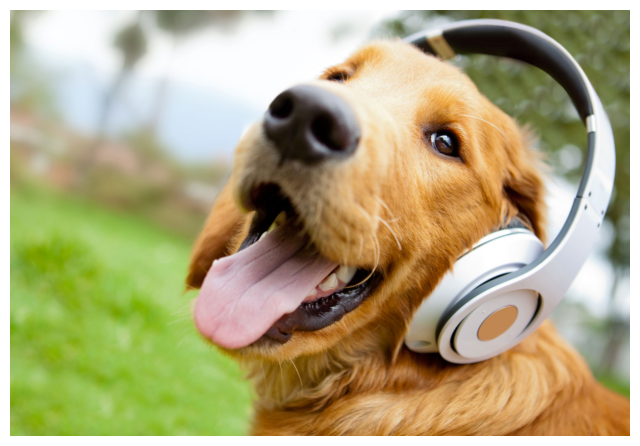

In [8]:
import matplotlib.pyplot as plt

#search for your image in /kaggle/working/dataset/ and copy the path here

image_path = f'/kaggle/working/dataset/{image_to_search}/Image_5.jpg'  #change image type to png,jpeg,jpg
img = cv2.imread(image_path)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(8, 8))
plt.imshow(img_rgb)
plt.axis('off')
plt.show()


#### <div style="background-color:#fff1cc; padding: 60px;">Using PreTrained Model mobilenet_v2 for classification</div> 

In [9]:
#path of your directory where all images are stored
path = f"/kaggle/working/dataset/{image_to_search}"

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: l

35363/35363 [==============================] - 0s 0us/step


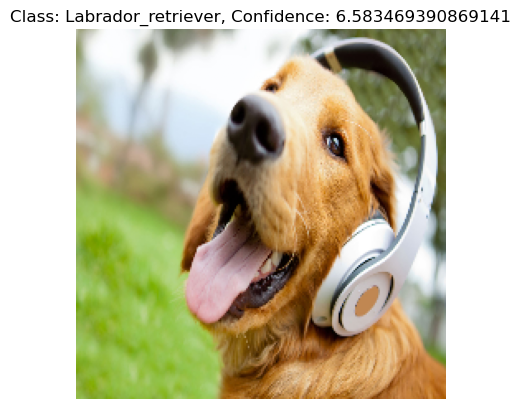

1/1 [==============================] - 0s 36ms/step


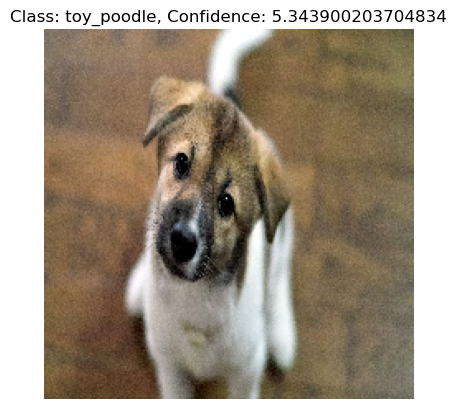

1/1 [==============================] - 0s 43ms/step


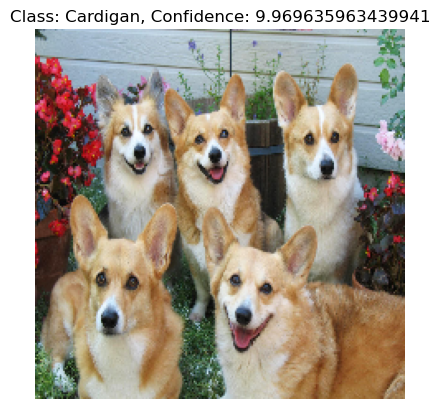

1/1 [==============================] - 0s 33ms/step


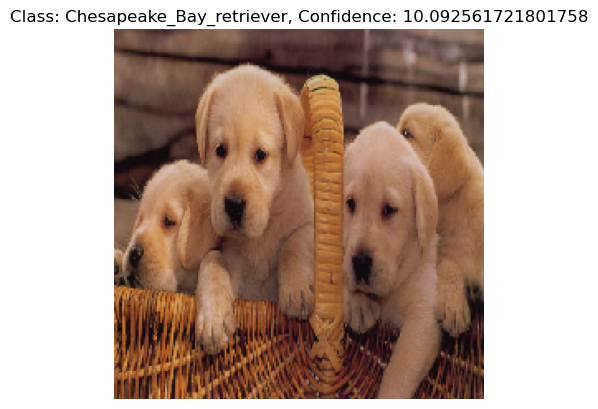

1/1 [==============================] - 0s 38ms/step


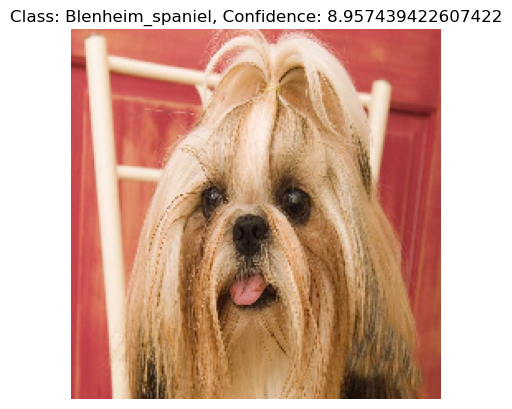

1/1 [==============================] - 0s 43ms/step


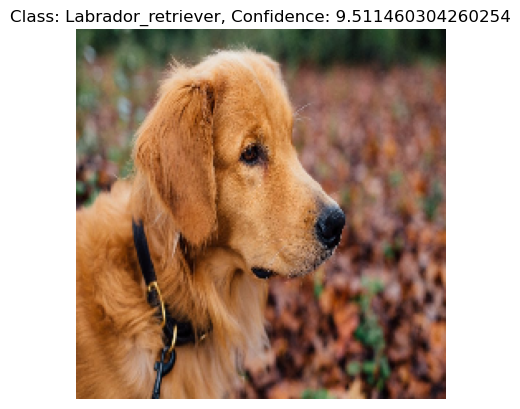

1/1 [==============================] - 0s 37ms/step


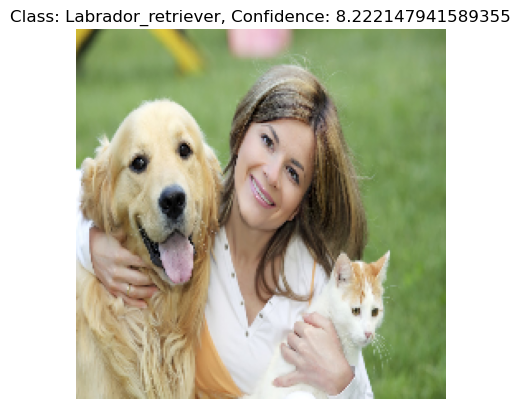

1/1 [==============================] - 0s 35ms/step


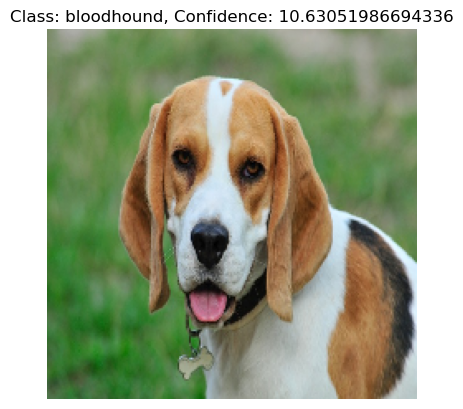

1/1 [==============================] - 0s 34ms/step


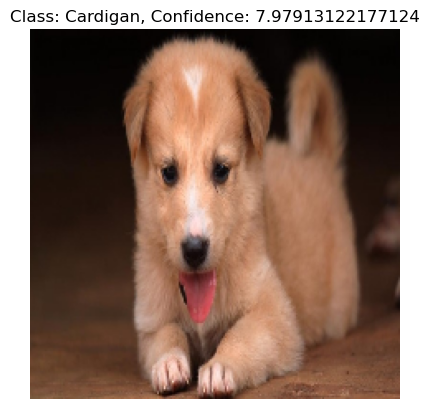

1/1 [==============================] - 0s 38ms/step


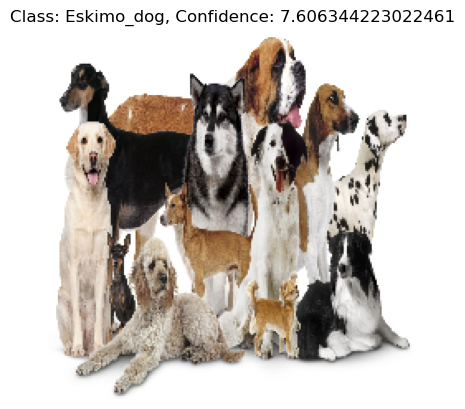

In [10]:
import os
import tensorflow as tf
import tensorflow_hub as hub
import numpy as np
import matplotlib.pyplot as plt

# Load the pre-trained model from TensorFlow Hub
model = tf.keras.Sequential([hub.KerasLayer("https://tfhub.dev/google/imagenet/mobilenet_v2_100_224/classification/5")])

# Folder containing the images
folder_path = path

# Get a list of all image files in the folder
image_files = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f)) and f.lower().endswith(('.jpg', '.jpeg', '.png', '.gif'))]

# Process and classify each image
for image_file in image_files:
    # Construct the full image path
    image_path = os.path.join(folder_path, image_file)

    # Load and preprocess the image
    image = tf.keras.preprocessing.image.load_img(image_path, target_size=(224, 224))
    image = tf.keras.preprocessing.image.img_to_array(image)
    image = image / 255.0  # Normalize the pixel values to the range of [0, 1]
    image = np.expand_dims(image, axis=0)  # Add a batch dimension

    # Perform image classification
    predictions = model.predict(image)
    
    # Remove the extra class index from predictions
    predictions = predictions[:, :-1]

    # Get the predicted class and confidence
    top_predicted_index = np.argmax(predictions)
    class_label = tf.keras.applications.imagenet_utils.decode_predictions(predictions, top=2)[0][0][1]
    confidence = tf.keras.applications.imagenet_utils.decode_predictions(predictions, top=2)[0][0][2]

    # Visualize the image and its predicted class
    image = np.squeeze(image, axis=0)  # Remove the batch dimension
    plt.imshow(image)
    plt.axis('off')
    plt.title(f"Class: {class_label}, Confidence: {confidence}")
    plt.show()


# <div style="background-color:#fff1cc; padding: 60px;">Some labels are not correct which will be improved in further versions, The main aim of this notebook was to show how to use Bing-image-downloader to create your own custom data</div> 


# <div style="background-color:#fda454; padding: 60px;">I Thank you for viewing my work.If you like it, consider sharing it to others or give feedback to improve the notebook 

 </div>